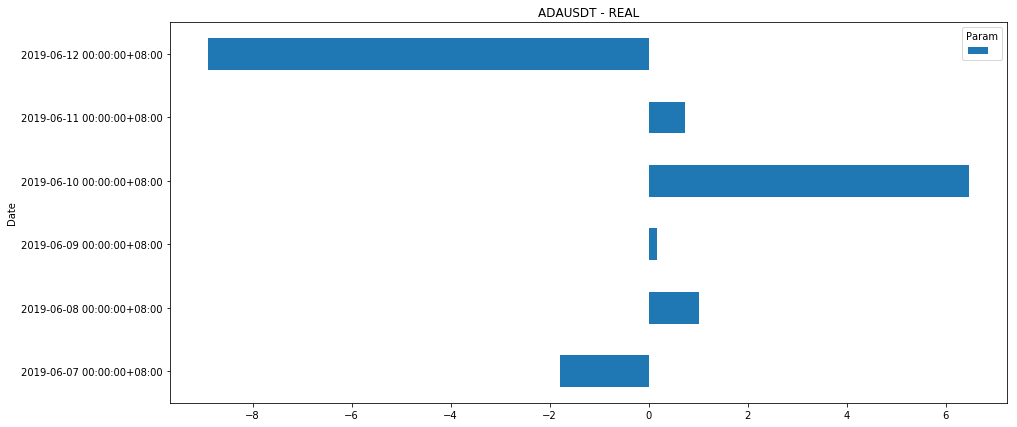

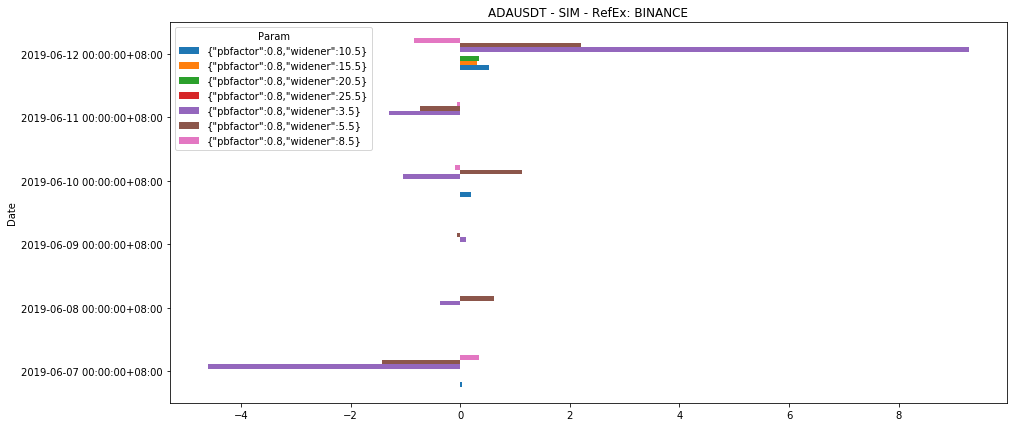

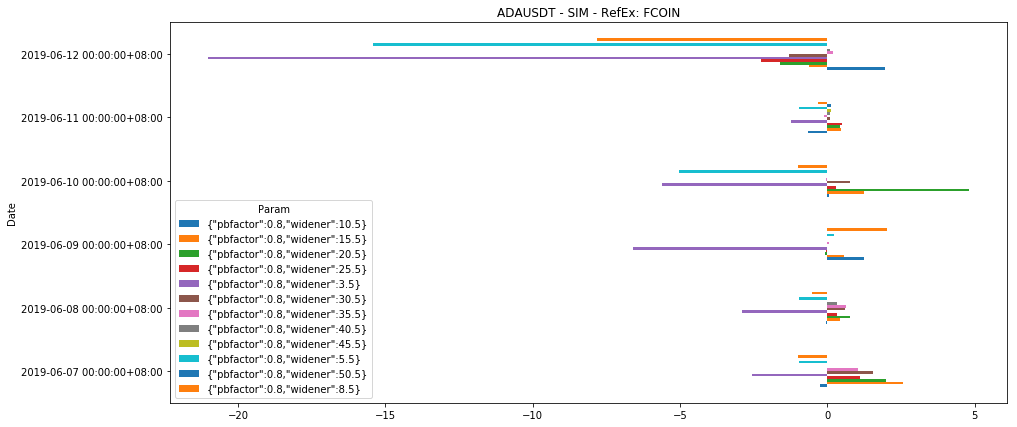

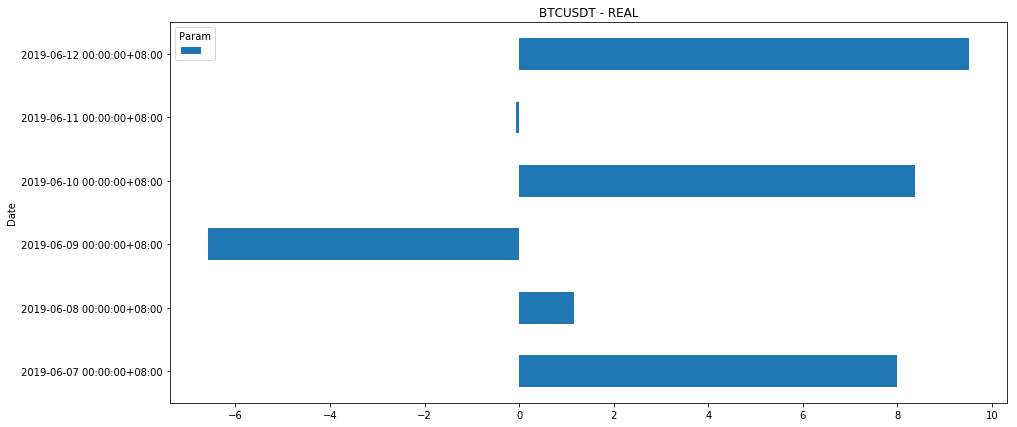

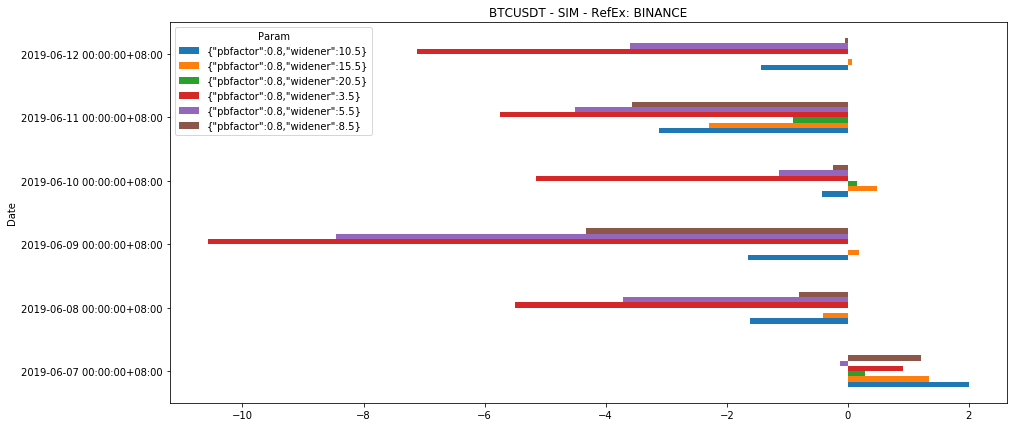

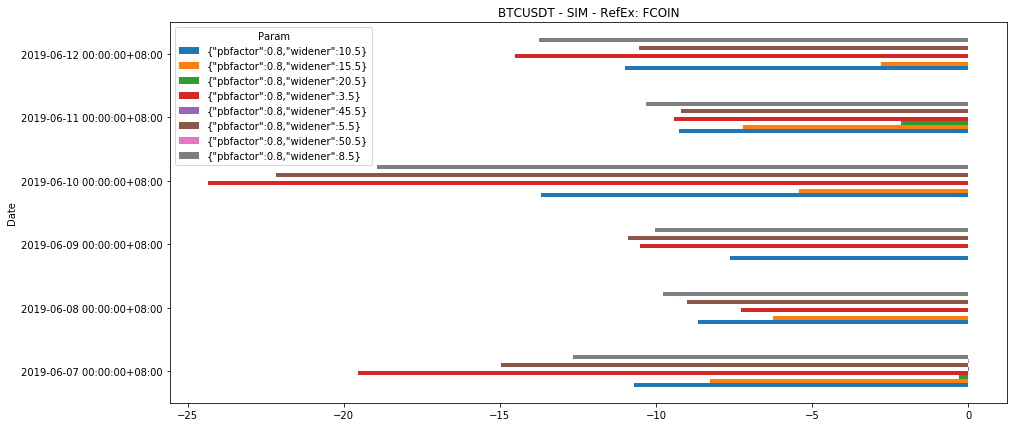

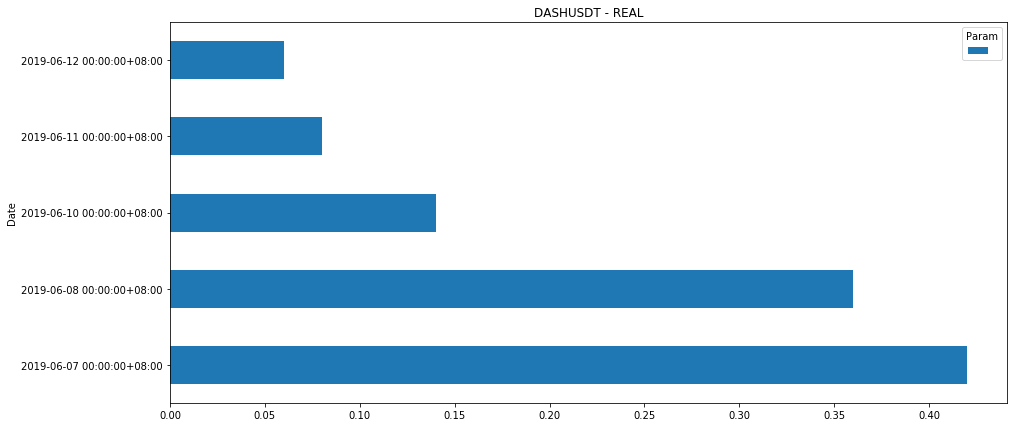

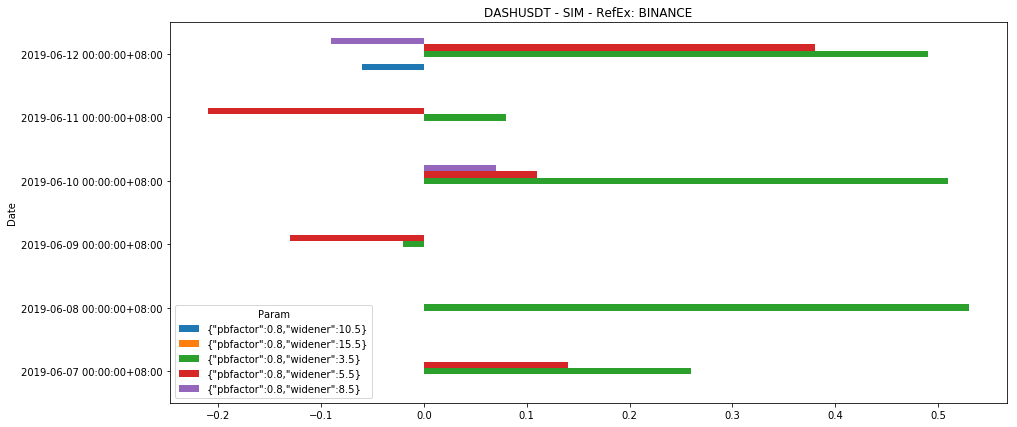

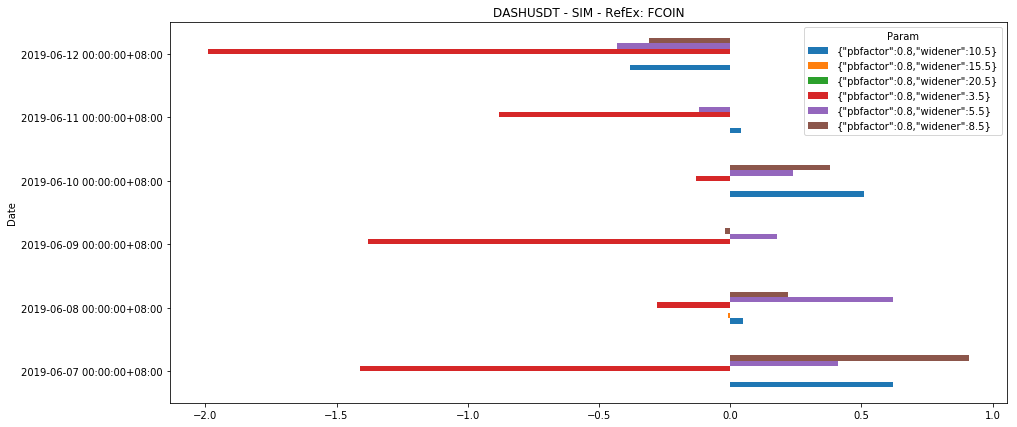

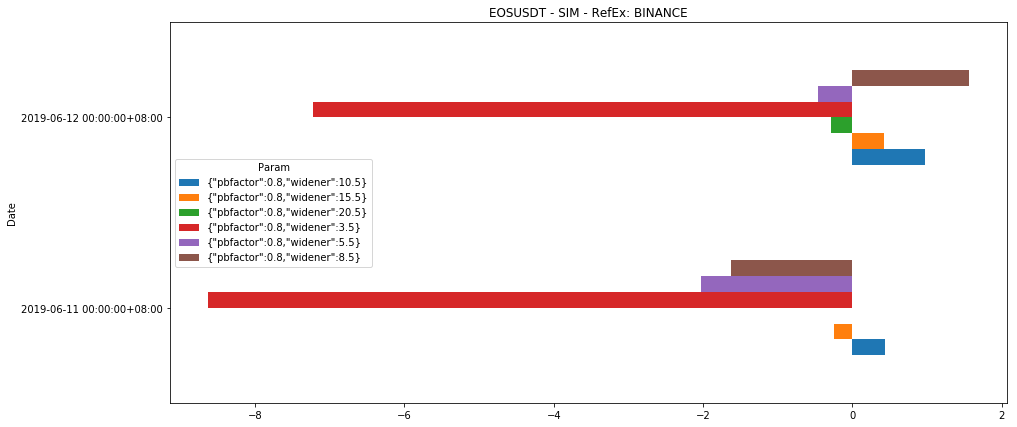

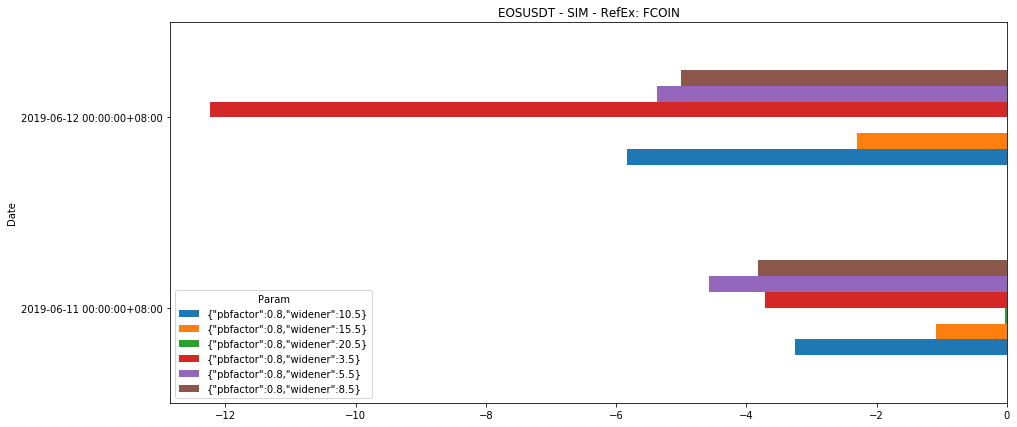

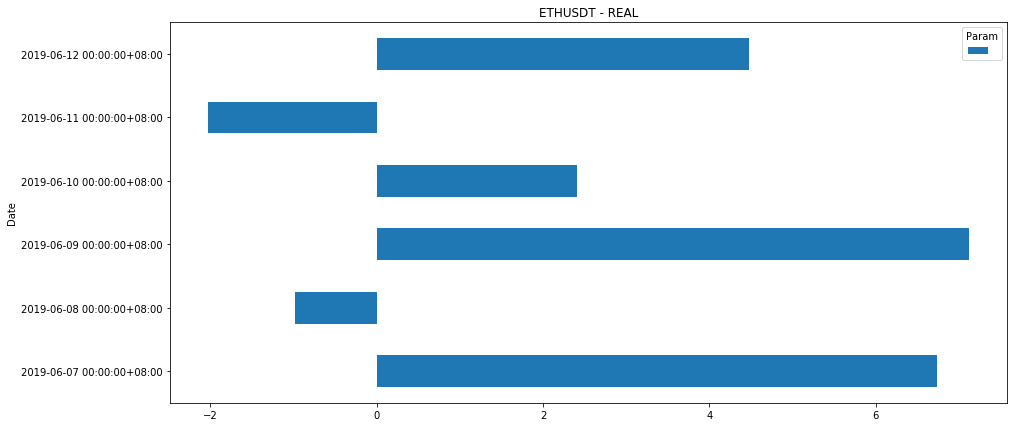

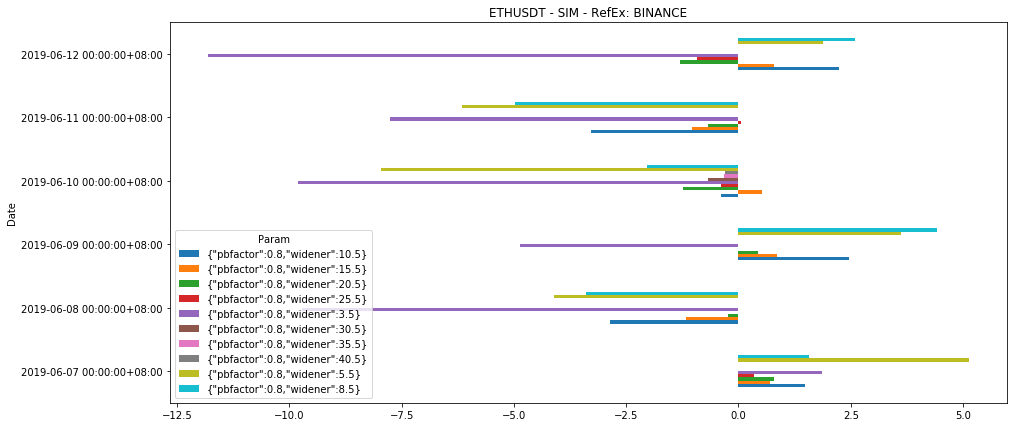

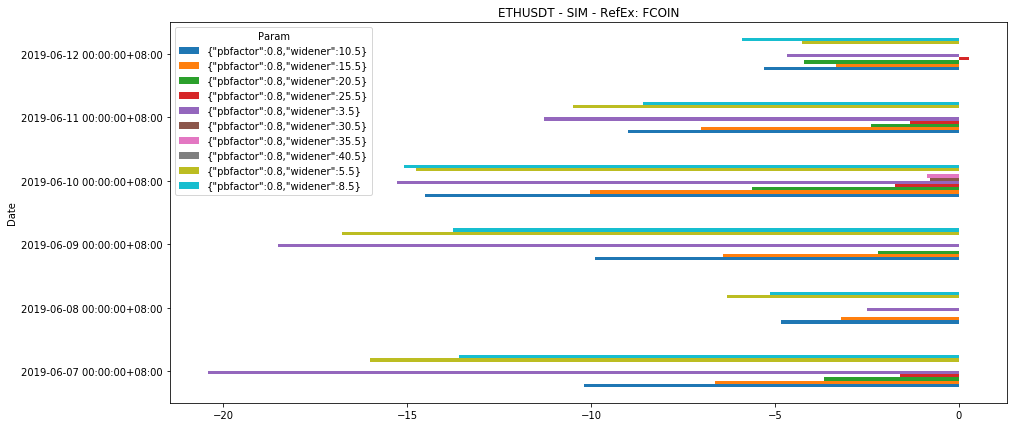

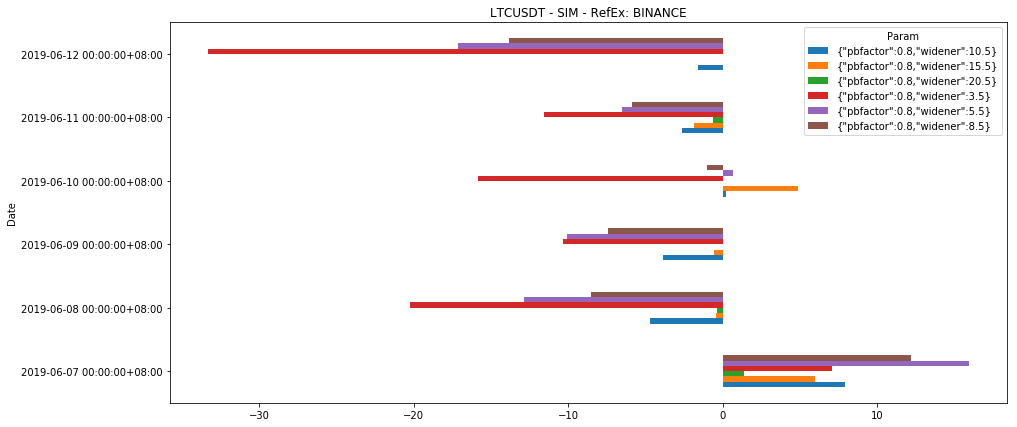

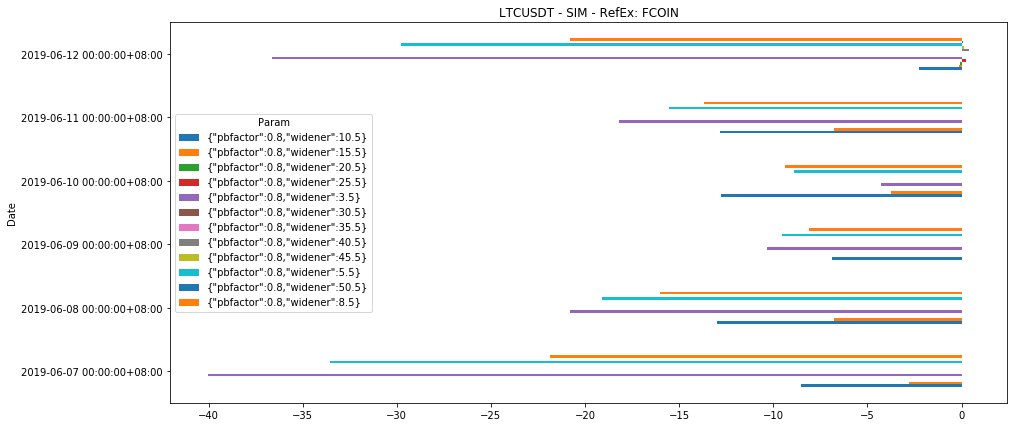

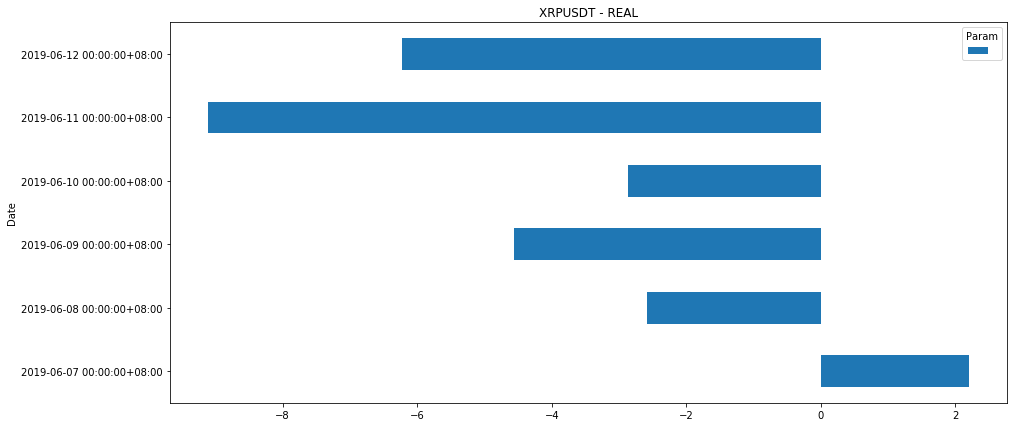

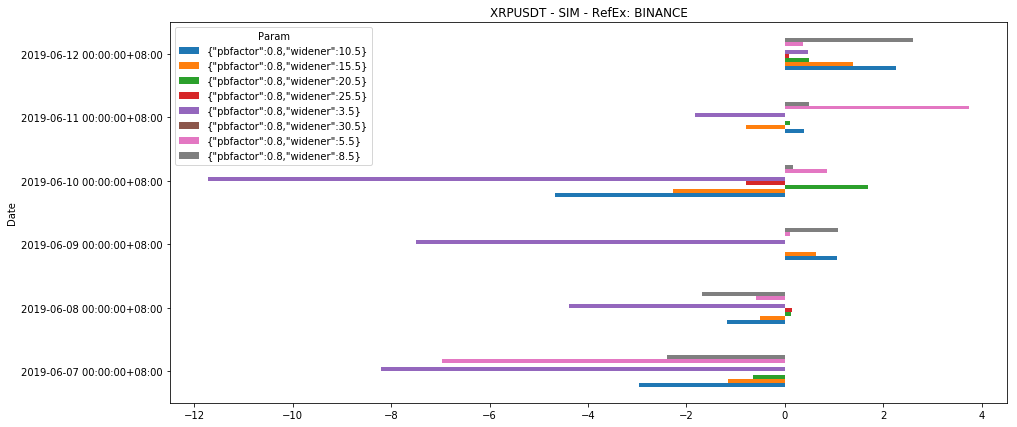

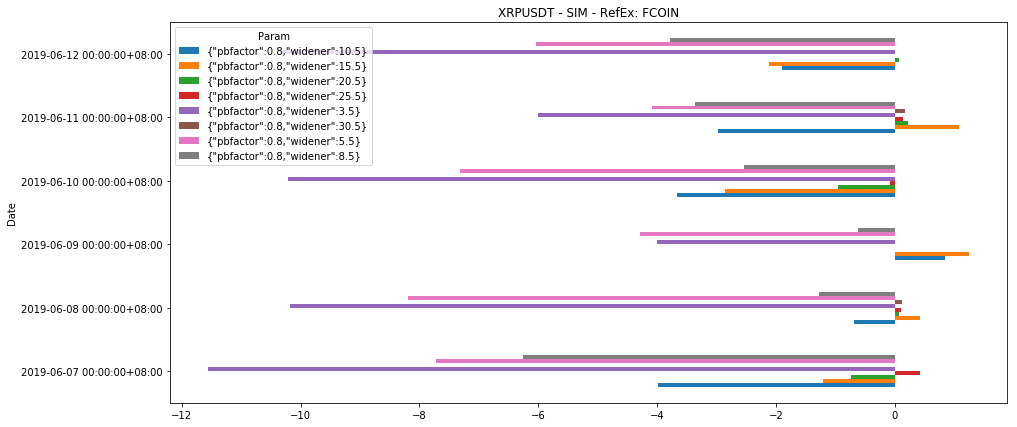

In [78]:
import pandas as pd
import matplotlib.pylab as plt
import iso8601
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

eod = pd.read_csv("eod_stackfc.csv")
eod = eod.dropna(subset=['Start'])

eod['Date'] = eod['Start'].apply(iso8601.parse_date)
eod['RefEx'].fillna("", inplace=True)
eod['Param'].fillna("", inplace=True)
eod = eod.drop(columns=['Start','End'])
grouped = eod.groupby(['Pair','Type','RefEx'])

for key, grp in grouped:
    fig, ax = plt.subplots(figsize=(15,7))
    # use unstack()
    ttl = key[0] + " - " + key[1]
    if len(key[2]) > 0:
        ttl += " - RefEx: " + key[2]
    a = grp.groupby(['Date','Param']).sum()['NetPL'].unstack().plot(
        kind='barh', ax=ax, title = ttl)
